In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from collections import Counter


# Constantes

In [15]:
PATH_NEUROESPORA = "redes/Neurospora_crassa/"
REDES_NEUROESPORA = {1:["Muestra1_M1N17h","Muestra1_M1N18h","Muestra1_M1N20h","Muestra1_M1N22h","Muestra1_M1N24h"],
    2:["Muestra2_M2N18h","Muestra2_M2N20h","Muestra2_M2N22h","Muestra2_M2N24h"],
    3:["Muestra3_M3N17h","Muestra3_M3N18h","Muestra3_M3N20h","Muestra3_M3N22h","Muestra3_M3N24h"],
    4:["Muestra4_M4N17h","Muestra4_M4N18h","Muestra4_M4N20h","Muestra4_M4N22h","Muestra4_M4N24h"],
    5:["Muestra5_M5N18h","Muestra5_M5N20h","Muestra5_M5N22h","Muestra5_M5N24h"]
}

In [16]:
PATH_TRICHODERMA = "redes/Trichoderma_atroviride/"
REDES_TRICHODERMA = {1:["Muestra1_M1T24h","Muestra1_M1T26h","Muestra1_M1T28h","Muestra1_M1T30h","Muestra1_M1T32h"],
    2:["Muestra2_M2T24h","Muestra2_M2T26h","Muestra2_M2T28h","Muestra2_M2T30h","Muestra2_M2T32h"],
    3:["Muestra3_M3T26h","Muestra3_M3T28h","Muestra3_M3T30h","Muestra3_M3T32h","Muestra3_M3T34h","Muestra3_M3T36h"],
    4:["Muestra4_M4T26h","Muestra4_M4T28h","Muestra4_M4T30h","Muestra4_M4T32h","Muestra4_M4T34h","Muestra4_M4T36h"],
    5:["Muestra5_M5T26h","Muestra5_M5T28h","Muestra5_M5T30h","Muestra5_M5T32h","Muestra5_M5T36h"]
}

# Datos para generar secuencias aleatorias

In [5]:
nodos_trichoderma = {1: [24, 68 , 84 , 148, 294],
                    2: [8, 16, 24, 62, 150],
                    3: [14, 42, 68, 160, 356, 788],
                    4: [18,24, 50,104, 268, 606],
                    5: [14,18,42,108,422]}
nodos_neurospora = {1: [42, 54 , 102 , 226, 663 ],
                    2: [44, 110, 226, 758,],
                    3: [6, 24, 50, 128, 338],
                    4: [58, 84, 202, 518, 1578],
                    5: [48, 100, 280, 790],
                    }

**** Procesando red: Muestra1_M1N17h con 42 nodos y 41 aristas.
**** Procesando árbol aleatorio con 42 nodos y 41 aristas.
Distribucion miscelio: {0: 0, 1: 22, 2: 0, 3: 20}
Distribucion aleatorio: {0: 0, 1: 20, 2: 11, 3: 8, 4: 1, 5: 0, 6: 2}
**** Procesando red: Muestra1_M1N18h con 54 nodos y 53 aristas.
**** Procesando árbol aleatorio con 54 nodos y 53 aristas.
Distribucion miscelio: {0: 0, 1: 28, 2: 0, 3: 26}
Distribucion aleatorio: {0: 0, 1: 21, 2: 19, 3: 10, 4: 3, 5: 1}
**** Procesando red: Muestra1_M1N20h con 102 nodos y 101 aristas.
**** Procesando árbol aleatorio con 102 nodos y 101 aristas.
Distribucion miscelio: {0: 0, 1: 52, 2: 0, 3: 50}
Distribucion aleatorio: {0: 0, 1: 34, 2: 45, 3: 15, 4: 7, 5: 1}
**** Procesando red: Muestra1_M1N22h con 226 nodos y 225 aristas.
**** Procesando árbol aleatorio con 226 nodos y 225 aristas.
Distribucion miscelio: {0: 0, 1: 114, 2: 0, 3: 112}
Distribucion aleatorio: {0: 0, 1: 85, 2: 79, 3: 46, 4: 12, 5: 3, 6: 1}
**** Procesando red: Muestra1_

/var/folders/gw/x5b6glr13clbt8md6003thh40000gn/T/ipykernel_18836/1217349276.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


**** Procesando red: Muestra4_M4N22h con 518 nodos y 528 aristas.
**** Procesando árbol aleatorio con 518 nodos y 517 aristas.
Distribucion miscelio: {0: 0, 1: 249, 2: 0, 3: 269}
Distribucion aleatorio: {0: 0, 1: 191, 2: 186, 3: 102, 4: 31, 5: 7, 6: 1}
**** Procesando red: Muestra4_M4N24h con 1578 nodos y 1657 aristas.
**** Procesando árbol aleatorio con 1578 nodos y 1577 aristas.
Distribucion miscelio: {0: 0, 1: 710, 2: 1, 3: 866, 4: 1}
Distribucion aleatorio: {0: 0, 1: 587, 2: 585, 3: 264, 4: 112, 5: 24, 6: 5, 7: 1}
**** Procesando red: Muestra5_M5N18h con 48 nodos y 47 aristas.
**** Procesando árbol aleatorio con 48 nodos y 47 aristas.
Distribucion miscelio: {0: 0, 1: 25, 2: 0, 3: 23}
Distribucion aleatorio: {0: 0, 1: 15, 2: 22, 3: 9, 4: 2}
**** Procesando red: Muestra5_M5N20h con 100 nodos y 99 aristas.
**** Procesando árbol aleatorio con 100 nodos y 99 aristas.
Distribucion miscelio: {0: 0, 1: 51, 2: 0, 3: 49}
Distribucion aleatorio: {0: 0, 1: 39, 2: 31, 3: 25, 4: 4, 5: 0, 6: 1}
*

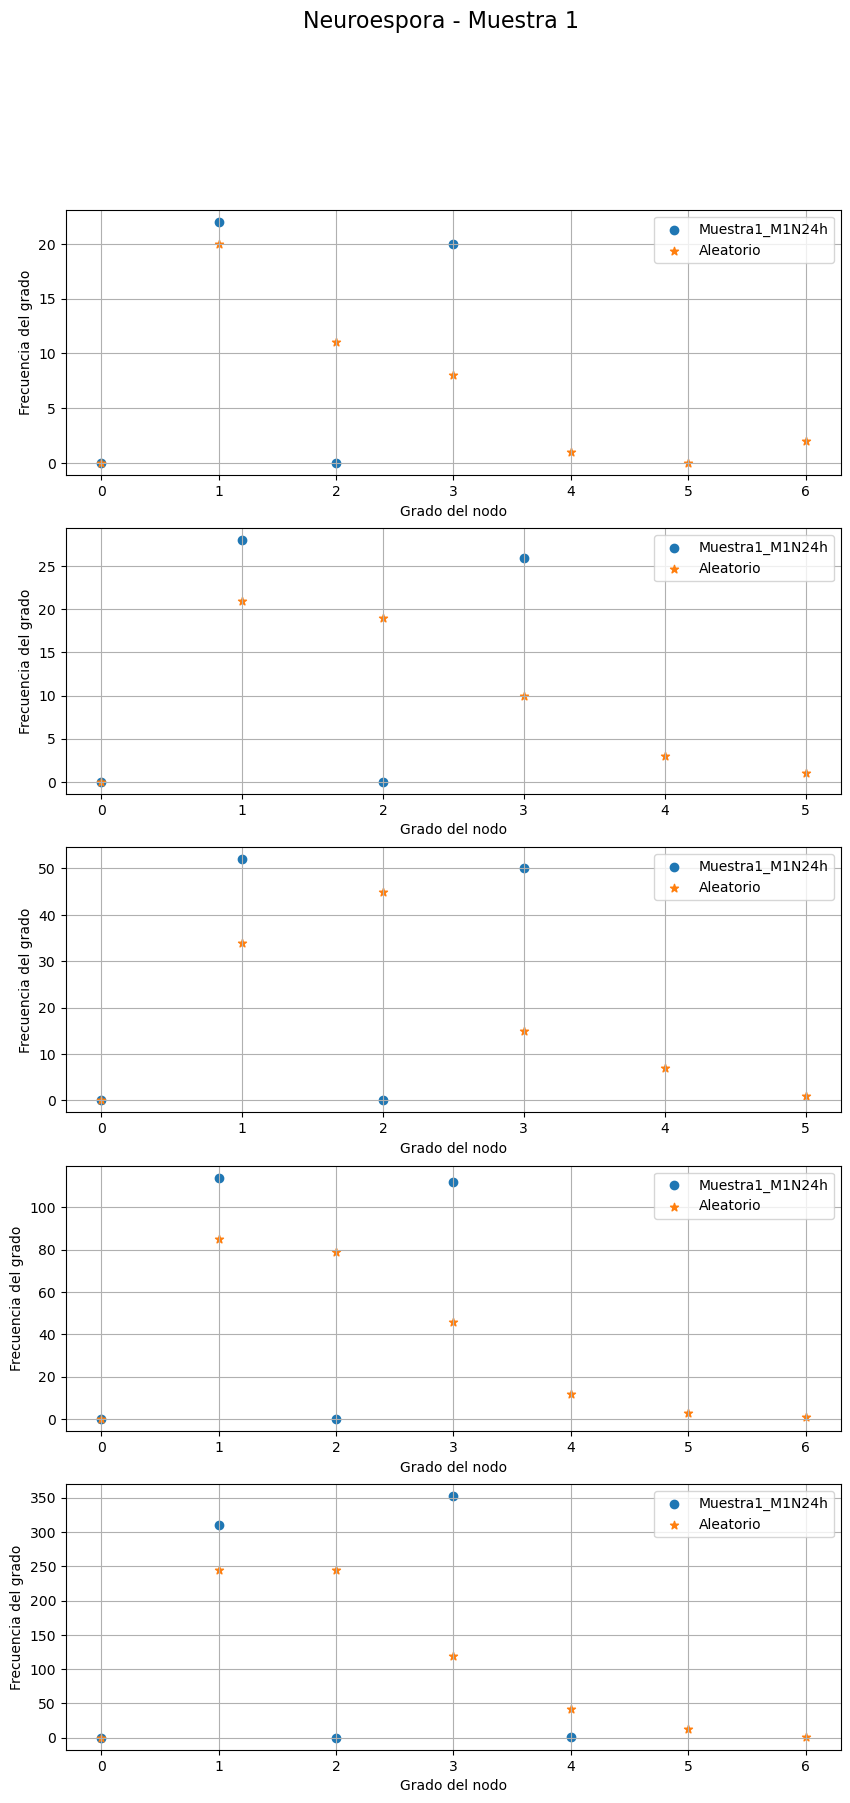

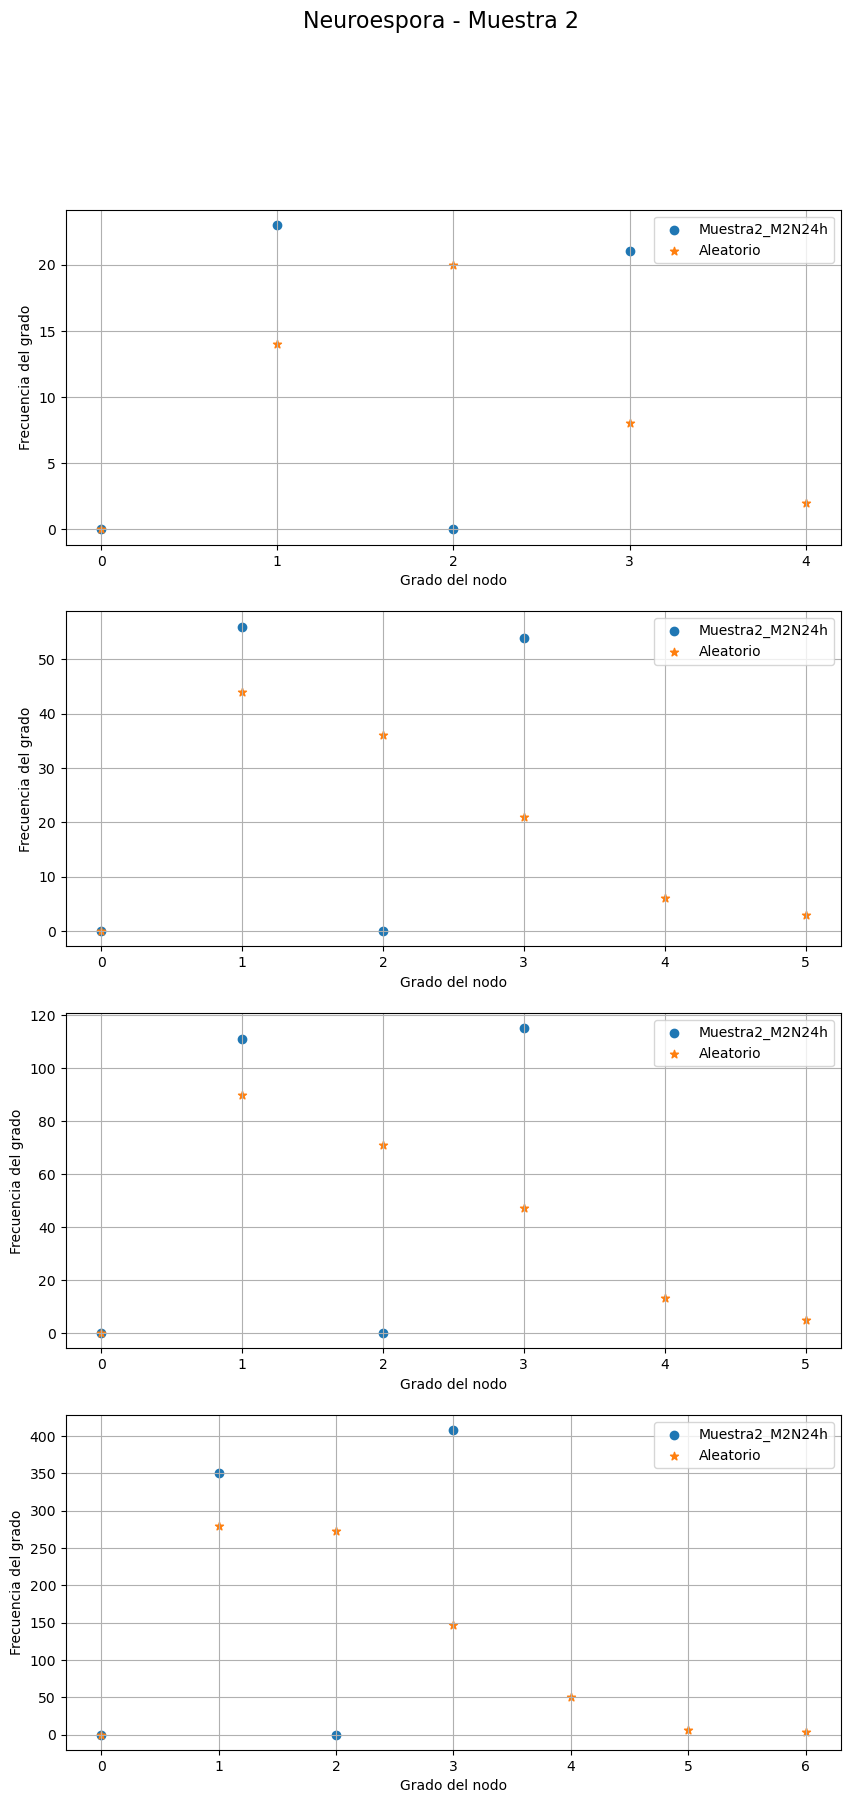

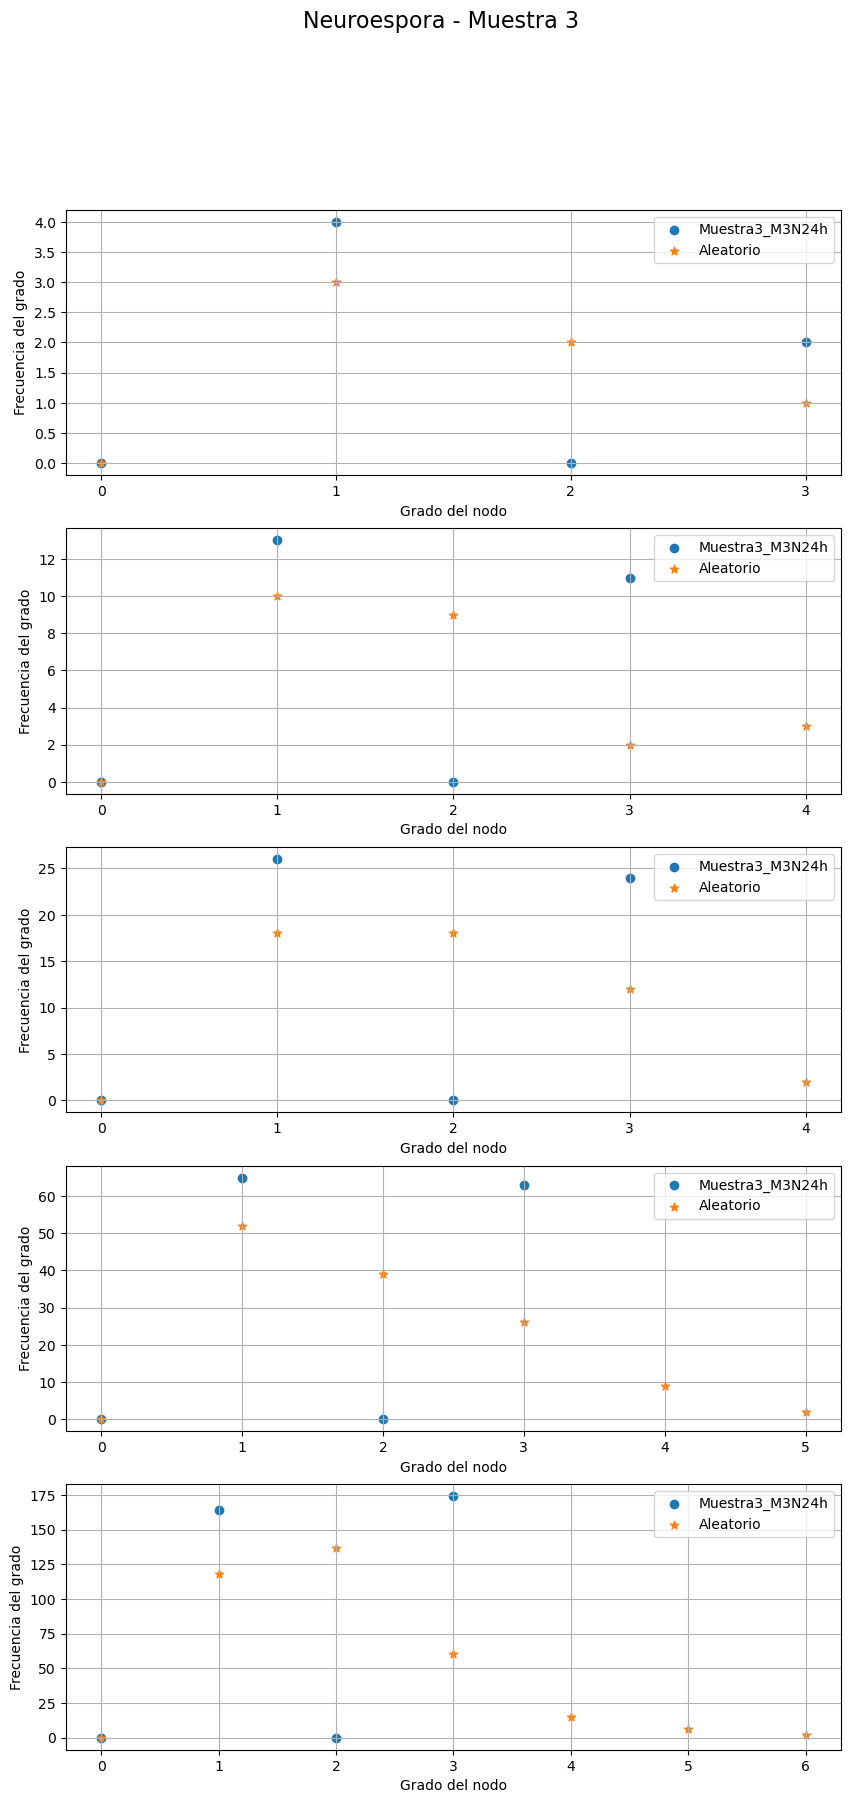

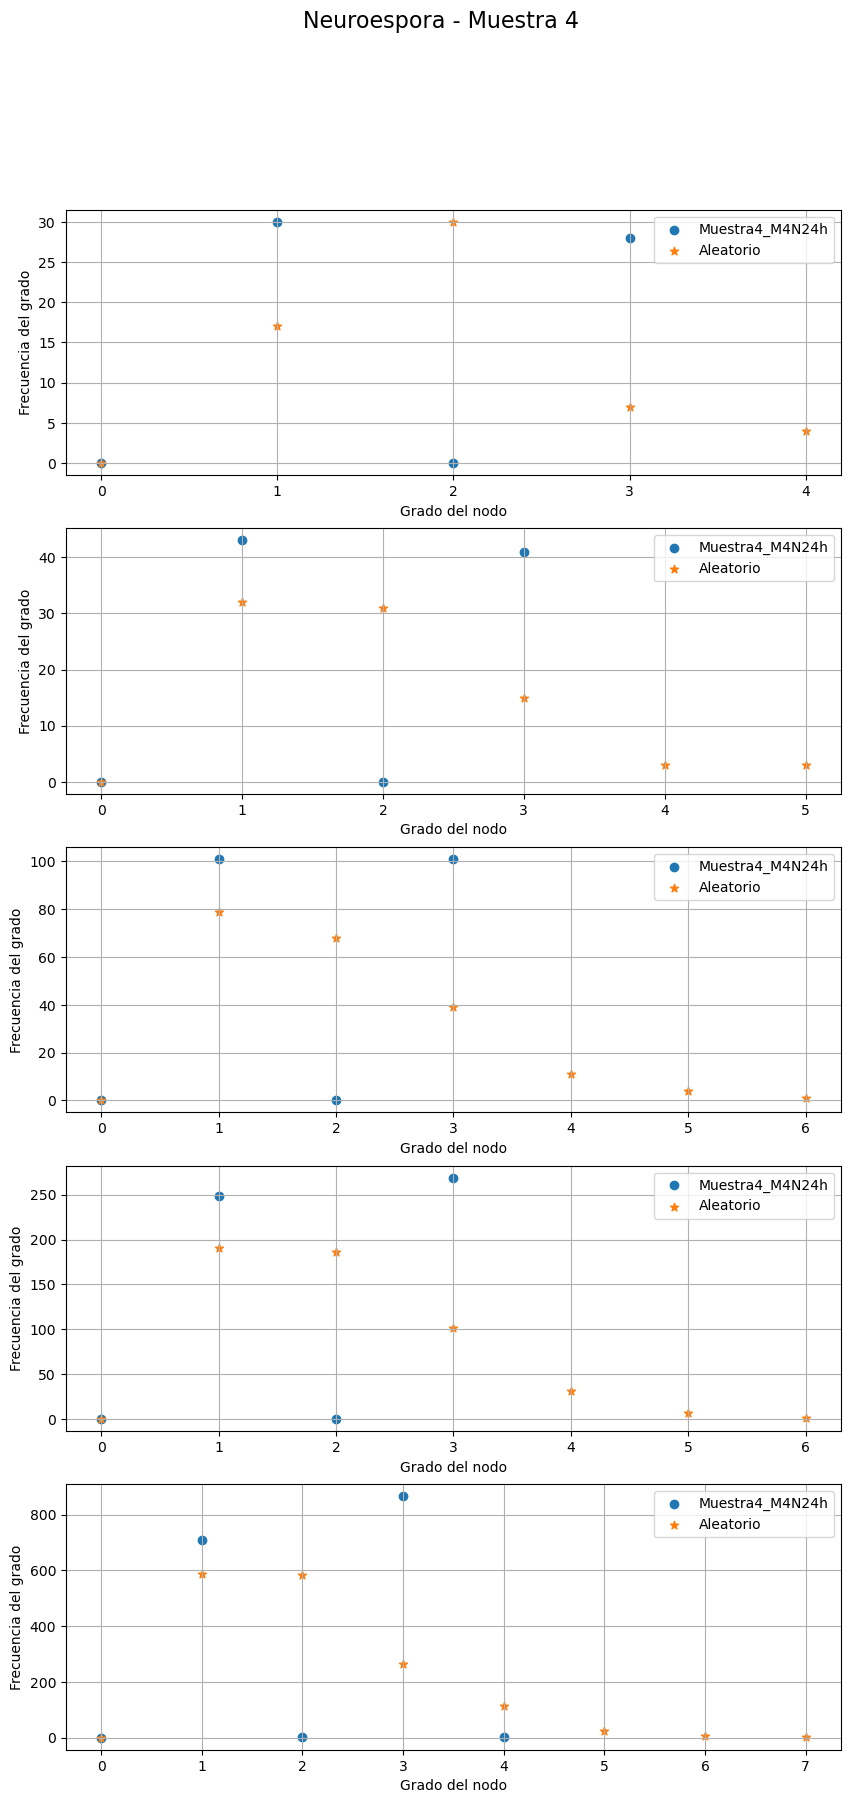

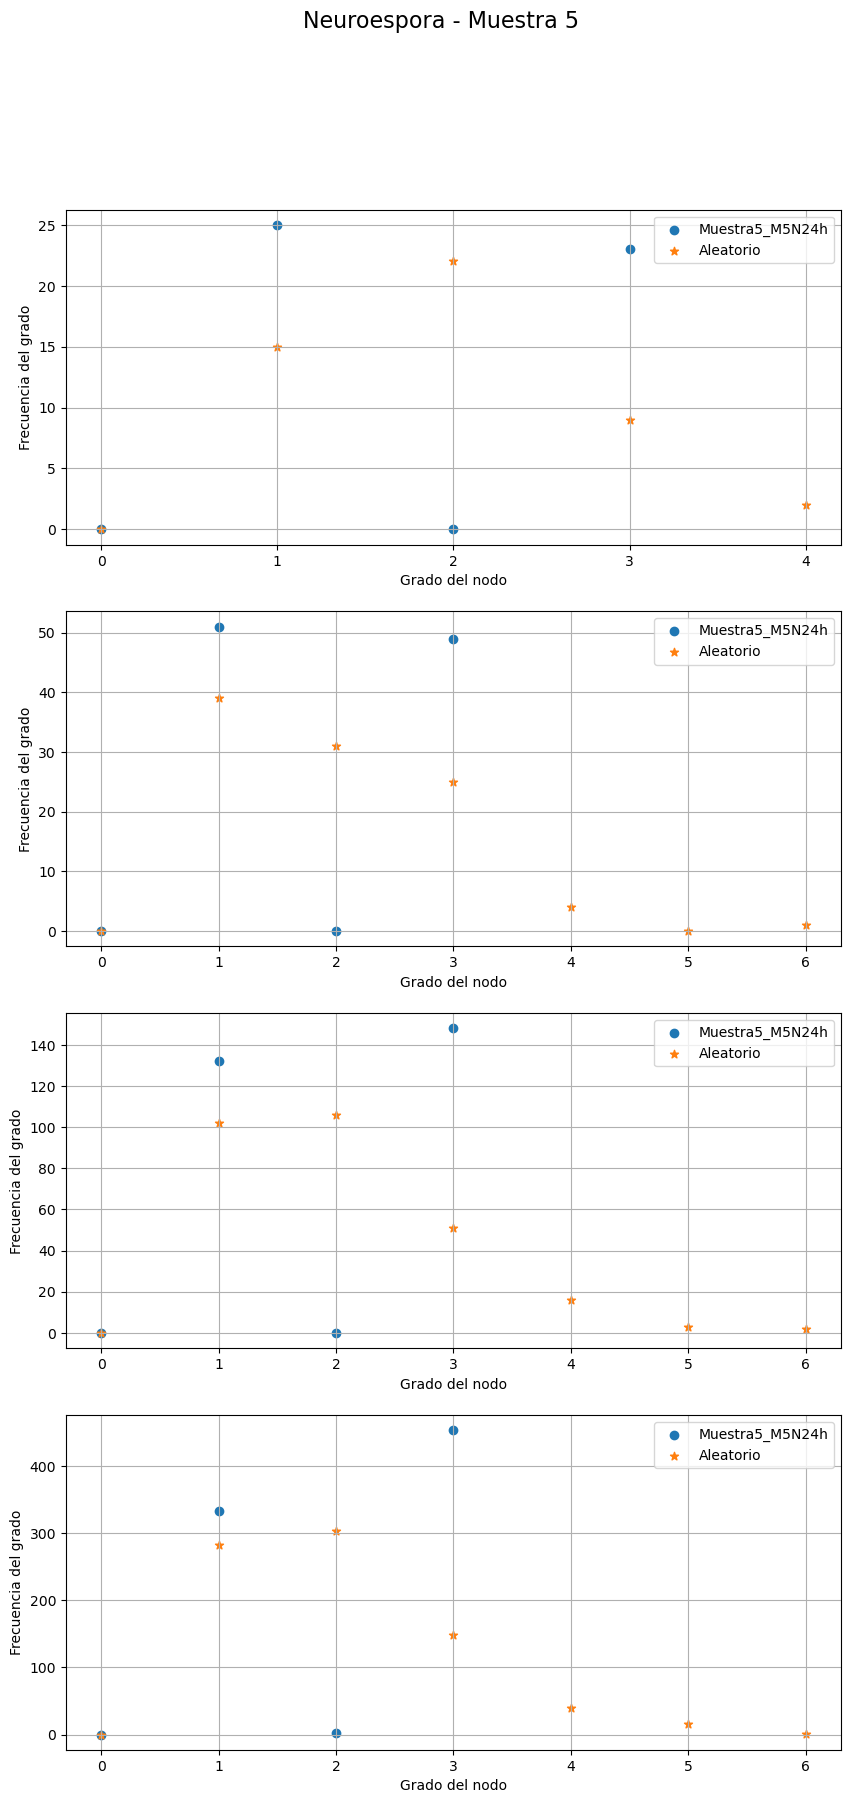

In [11]:
for muestra in range(1,6):
    grados_seq = list()
    for red in REDES_NEUROESPORA[muestra]:
        G = nx.read_gexf(PATH_NEUROESPORA + red + ".gexf")
        print("**** Procesando red:", red, "con", G.number_of_nodes(), "nodos y", G.number_of_edges(), "aristas.")
        degree_miscelio = get_degree_distribution(G)
        # Procesa árbol aleatorio
        n = G.number_of_nodes()
        R = nx.generators.random_tree(n)
        print("**** Procesando árbol aleatorio con", R.number_of_nodes(), "nodos y", R.number_of_edges(), "aristas.")
        degree_aletorio = get_degree_distribution(R)
        grados_seq.append([degree_miscelio, degree_aletorio])
        # Para dibujar el árbol
        # pos = {n:(G.nodes[n]['x'],G.nodes[n]['y']) for n in G.nodes()}
        #dibujar_arbol(G, red,pos, node_labels)
        print("Distribucion miscelio:", degree_miscelio)
        print("Distribucion aleatorio:", degree_aletorio)
    muestra_distribuciones(grados_seq, [red, "Aleatorio"], "Neuroespora - Muestra " + str(muestra), "Grado del nodo", "Frecuencia del grado")

In [10]:
def muestra_distribuciones(distribuciones, etiquetas, titulo, xlabel, ylabel):
    # Crear figura y ejes en una cuadrícula 2x2
    fig, axes = plt.subplots(len(distribuciones),1, figsize=(10, 20))
    for i, seq in enumerate(distribuciones):
        grados1 = list(seq[0].keys())
        frecuencias = list(seq[0].values())
        axes[i].scatter(grados1, frecuencias, label=etiquetas[0], marker="o")
        grados2 = list(seq[1].keys())
        frecuencias = list(seq[1].values())
        axes[i].scatter(grados2, frecuencias, label=etiquetas[1], marker="*")
        max_degree = max(max(grados1), max(grados2))
        axes[i].set_xticks(range(0, max_degree+1))
        #axes[i].plot(seq[0], label=etiquetas[0], marker="o", linestyle="-")
        #axes[i].plot(seq[1], label=etiquetas[1], marker="*", linestyle="-")
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)
        axes[i].legend()
        axes[i].grid()
    fig.suptitle(titulo, fontsize=16)
    fig.show()

# Utilería para redes

In [18]:
def dibujar_arbol(G, titulo,pos, node_labels):
    nx.draw(G, pos, node_size=600)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='white')
    plt.title(titulo)
    plt.show()

In [9]:
def get_degree_distribution(G):
    lista_grados = [d for _, d in G.degree()]

    # Contar cuántos nodos tienen cada grado
    conteo = Counter(lista_grados)

    # Obtener el grado máximo
    grado_max = max(lista_grados)

    # Rellenar grados faltantes con 0
    for g in range(grado_max + 1):
        if g not in conteo:
            conteo[g] = 0

    # Ordenar por grado
    conteo_ordenado = dict(sorted(conteo.items()))
    return conteo_ordenado


# Diámetro

In [12]:
def muestra_diametro(diametro, etiquetas, titulo, xlabel, ylabel, xval):
    # Crear figura y ejes en una cuadrícula 2x2
    #fig = plt.subplots(len(diametro),1, figsize=(10, 20))
    plt.plot(xval, diametro[0], label=etiquetas[0], marker="o")
    plt.plot(xval, diametro[1], label=etiquetas[1], marker="*")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation=90)  # Rota etiquetas del eje X
    plt.title(titulo)
    plt.legend()  # Muestra las etiquetas
    plt.show()


**** Procesando red: Muestra1_M1T24h con 24 nodos y 24 aristas.
**** Procesando árbol aleatorio con 24 nodos y 23 aristas.
**** Procesando red: Muestra1_M1T26h con 68 nodos y 70 aristas.
**** Procesando árbol aleatorio con 68 nodos y 67 aristas.
**** Procesando red: Muestra1_M1T28h con 84 nodos y 86 aristas.
**** Procesando árbol aleatorio con 84 nodos y 83 aristas.
**** Procesando red: Muestra1_M1T30h con 148 nodos y 152 aristas.
**** Procesando árbol aleatorio con 148 nodos y 147 aristas.
**** Procesando red: Muestra1_M1T32h con 294 nodos y 314 aristas.
**** Procesando árbol aleatorio con 294 nodos y 293 aristas.
Diametro miscelio: [11, 22, 26, 29, 40]
Diametri aleatorio: [12, 19, 25, 29, 63]


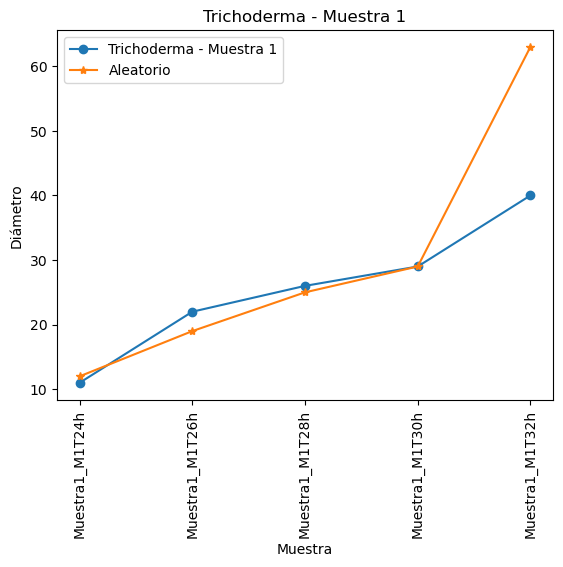

**** Procesando red: Muestra2_M2T24h con 8 nodos y 7 aristas.
**** Procesando árbol aleatorio con 8 nodos y 7 aristas.
**** Procesando red: Muestra2_M2T26h con 16 nodos y 15 aristas.
**** Procesando árbol aleatorio con 16 nodos y 15 aristas.
**** Procesando red: Muestra2_M2T28h con 24 nodos y 23 aristas.
**** Procesando árbol aleatorio con 24 nodos y 23 aristas.
**** Procesando red: Muestra2_M2T30h con 62 nodos y 62 aristas.
**** Procesando árbol aleatorio con 62 nodos y 61 aristas.
**** Procesando red: Muestra2_M2T32h con 150 nodos y 159 aristas.
**** Procesando árbol aleatorio con 150 nodos y 149 aristas.
Diametro miscelio: [4, 7, 9, 18, 29]
Diametri aleatorio: [5, 7, 15, 21, 41]


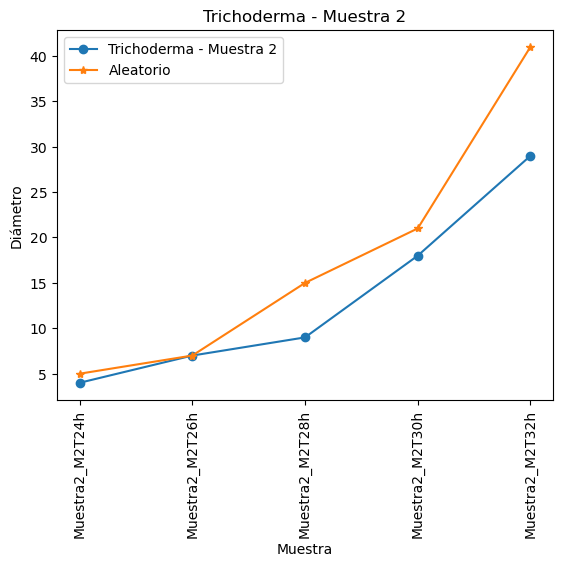

**** Procesando red: Muestra3_M3T26h con 14 nodos y 13 aristas.
**** Procesando árbol aleatorio con 14 nodos y 13 aristas.
**** Procesando red: Muestra3_M3T28h con 42 nodos y 41 aristas.
**** Procesando árbol aleatorio con 42 nodos y 41 aristas.
**** Procesando red: Muestra3_M3T30h con 68 nodos y 68 aristas.
**** Procesando árbol aleatorio con 68 nodos y 67 aristas.
**** Procesando red: Muestra3_M3T32h con 160 nodos y 178 aristas.
**** Procesando árbol aleatorio con 160 nodos y 159 aristas.
**** Procesando red: Muestra3_M3T34h con 356 nodos y 403 aristas.
**** Procesando árbol aleatorio con 356 nodos y 355 aristas.
**** Procesando red: Muestra3_M3T36h con 788 nodos y 953 aristas.
**** Procesando árbol aleatorio con 788 nodos y 787 aristas.
Diametro miscelio: [6, 13, 19, 30, 40, 57]
Diametri aleatorio: [8, 17, 26, 41, 68, 88]


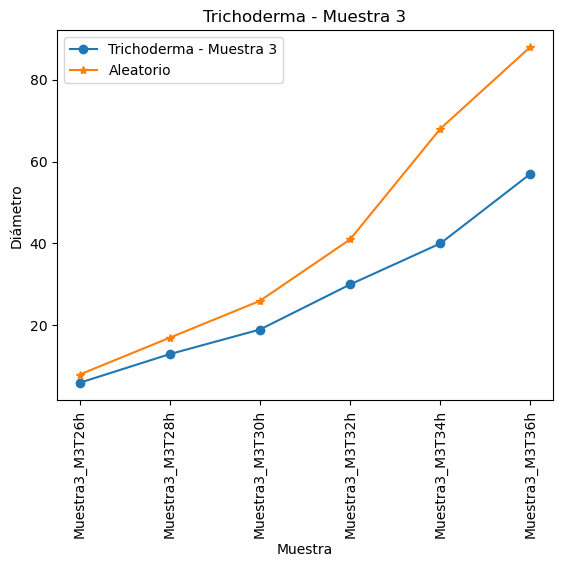

**** Procesando red: Muestra4_M4T26h con 18 nodos y 17 aristas.
**** Procesando árbol aleatorio con 18 nodos y 17 aristas.
**** Procesando red: Muestra4_M4T28h con 24 nodos y 23 aristas.
**** Procesando árbol aleatorio con 24 nodos y 23 aristas.
**** Procesando red: Muestra4_M4T30h con 50 nodos y 50 aristas.
**** Procesando árbol aleatorio con 50 nodos y 49 aristas.
**** Procesando red: Muestra4_M4T32h con 104 nodos y 106 aristas.
**** Procesando árbol aleatorio con 104 nodos y 103 aristas.
**** Procesando red: Muestra4_M4T34h con 268 nodos y 288 aristas.
**** Procesando árbol aleatorio con 268 nodos y 267 aristas.
**** Procesando red: Muestra4_M4T36h con 606 nodos y 675 aristas.
**** Procesando árbol aleatorio con 606 nodos y 605 aristas.
Diametro miscelio: [8, 10, 15, 28, 41, 57]
Diametri aleatorio: [8, 13, 15, 30, 58, 73]


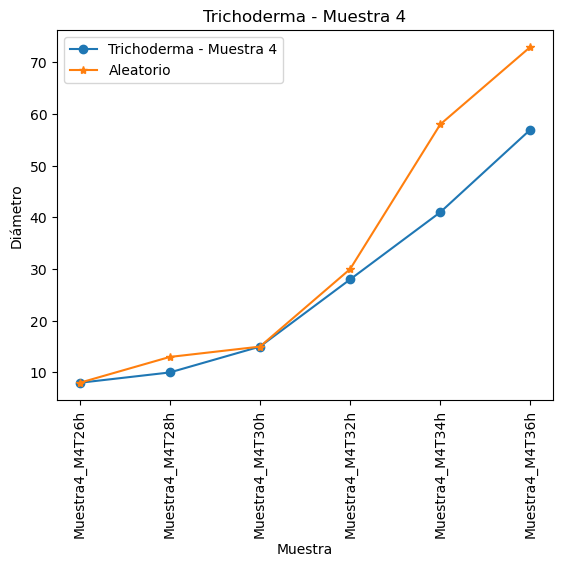

**** Procesando red: Muestra5_M5T26h con 14 nodos y 13 aristas.
**** Procesando árbol aleatorio con 14 nodos y 13 aristas.
**** Procesando red: Muestra5_M5T28h con 18 nodos y 17 aristas.
**** Procesando árbol aleatorio con 18 nodos y 17 aristas.
**** Procesando red: Muestra5_M5T30h con 42 nodos y 41 aristas.
**** Procesando árbol aleatorio con 42 nodos y 41 aristas.
**** Procesando red: Muestra5_M5T32h con 108 nodos y 108 aristas.
**** Procesando árbol aleatorio con 108 nodos y 107 aristas.
**** Procesando red: Muestra5_M5T36h con 432 nodos y 476 aristas.
**** Procesando árbol aleatorio con 432 nodos y 431 aristas.
Diametro miscelio: [7, 8, 13, 21, 35]
Diametri aleatorio: [9, 10, 16, 27, 58]


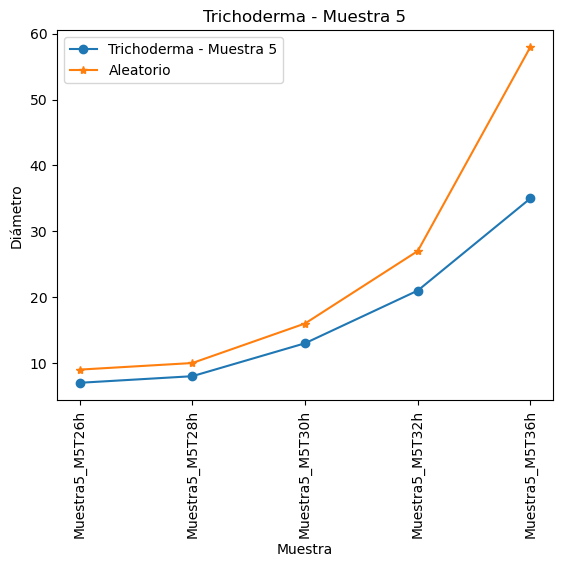

In [13]:
for muestra in range(1,6):
    diametro_miscelio = list()
    diametro_aleatorio = list()
    for red in REDES_TRICHODERMA[muestra]:
        G = nx.read_gexf(PATH_TRICHODERMA + red + ".gexf")
        print("**** Procesando red:", red, "con", G.number_of_nodes(), "nodos y", G.number_of_edges(), "aristas.")
        diametro = nx.diameter(G)
        diametro_miscelio.append(diametro)
        # Procesa árbol aleatorio
        n = G.number_of_nodes()
        R = nx.generators.random_tree(n)
        print("**** Procesando árbol aleatorio con", R.number_of_nodes(), "nodos y", R.number_of_edges(), "aristas.")
        diametro = nx.diameter(R)
        diametro_aleatorio.append(diametro)
    print("Diametro miscelio:", diametro_miscelio)
    print("Diametri aleatorio:", diametro_aleatorio)
    muestra_diametro([diametro_miscelio,diametro_aleatorio], ["Trichoderma - Muestra " + str(muestra), "Aleatorio"], "Trichoderma - Muestra " + str(muestra), "Muestra", "Diámetro", REDES_TRICHODERMA[muestra])